#### AUTHOR: Pramit Ray

<h5>Task2: Prediction using Unsupervised ML</h5>

In this task, using the iris dataset I will predict the optimum number of clusters and respresent in visually.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

<h5>Loading and reading the dataset</h5>

In [2]:
iris = load_iris()
dataset = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<h5>Clustering model</h5>

In [4]:
from sklearn.cluster import KMeans

In [5]:
x = dataset.iloc[:, [0, 1, 2, 3]].values

In [6]:

model = KMeans(n_clusters=3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_pred = model.fit_predict(x)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

<h5>Determining Optimum number of Clusters for KMeans</h5>

In [7]:
# Finding the optimum number of clusters for k-means classification
sse = []
k_rng = range(1,11)
for k in k_rng:
    KM = KMeans(n_clusters=k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0 )
    KM.fit(x)
    sse.append(KM.inertia_)

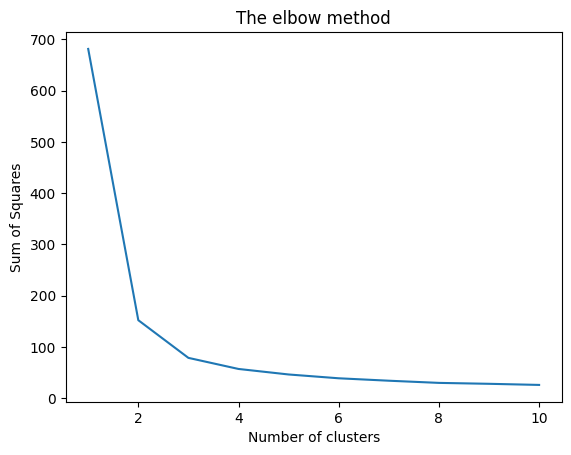

In [8]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), sse)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squares') # Within cluster sum of squares
plt.show()

From this we chose 3 clusters

<h5>Visualizing the clusters</h5>

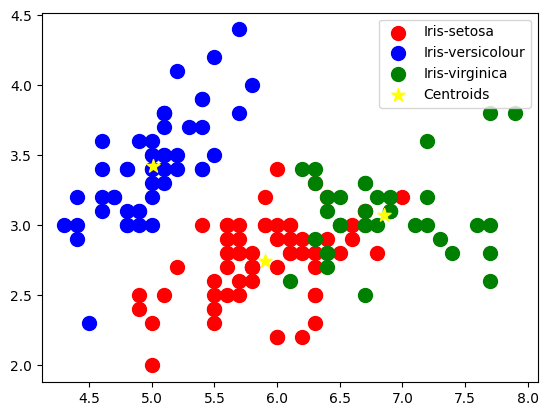

In [9]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids', marker='*')

plt.legend()